This is the file for Dataset 1, "Covertype."  We will be classifying the type of trees in the forest based on the other variables.

In [1]:
# Helpful Variables
mlp_filename = "./models/mlp.pkl"
mlp1_filename = "./models/mlp1.pkl"
mlp2_filename = "./models/mlp2.pkl"
mlp3_filename = "./models/mlp3.pkl"

lreg_filename = "./models/lreg.pkl"

In [2]:
import pandas as pd
import joblib
from pathlib import Path
from ucimlrepo import fetch_ucirepo 

# Load the Covertype dataset

covertype_features_filename = "./data/covertype_features.pkl"
covertype_targets_filename = "./data/covertype_targets.pkl"
path = Path(covertype_features_filename)

if not path.is_file():
    # download the dataset. It will take about a minute.
    print("Downloading dataset")
    covertype = fetch_ucirepo(id=31) 
    
    joblib.dump(covertype.data.features, covertype_features_filename)
    joblib.dump(covertype.data.targets, covertype_targets_filename)

# Load the covertype dataset
covertype_features = joblib.load(covertype_features_filename)
covertype_targets = joblib.load(covertype_targets_filename)

covertype_features.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [3]:

# First, let's inspect the data we have to work with
print(f"Features: {list(covertype_features.columns)}")
print(f"Target: {list(covertype_targets.columns)}")

# Have a variety of pieces of information about the 30x30 meter forest cells
print("Head of data:")

# And the number of entries
print(f"We have {covertype_features.shape[0]} entries for {covertype_features.shape[1]} features")



Features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
Target: ['Cover_Type']
Head of data:
We have 581012 entries for 54 features


In [4]:
# We also want to clean up our data so it is workable

# First, combine into same dataframe
df = covertype_features
df['Cover_Type'] = covertype_targets

# Note that there are no missing datapoints, so nothing needs to be dropped/fixed
print(f"Number of NaN Values: {df.isna().sum().sum()}")

# Also, all of the values are numeric so we don't need to fix that either

# Finally, separate into X and y
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

Number of NaN Values: 0


In [5]:
# Now, need to rescale
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to pandas dataframe
df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
df_scaled["Cover_Type"] = y
df_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.232859,-0.879364,-0.260673,5


In [6]:
# Also, let's split the data into training and testing sets for ease of work
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# These next two blocks lets us validate the stratification worked

y_train.value_counts()

Cover_Type
2    226640
1    169472
3     28603
7     16408
6     13894
5      7594
4      2198
Name: count, dtype: int64

In [8]:
y_test.value_counts()

Cover_Type
2    56661
1    42368
3     7151
7     4102
6     3473
5     1899
4      549
Name: count, dtype: int64

## Neural Network
Our task is to use classify the cover type (type of trees) based on the other features.  First, we will use a neural network.

In [ ]:
# First, we'll train a neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,2),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.1,
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp,mlp_filename)

Iteration 1, loss = 0.76879992
Iteration 2, loss = 0.65469220
Iteration 3, loss = 0.57819546
Iteration 4, loss = 0.55308935
Iteration 5, loss = 0.53735171
Iteration 6, loss = 0.52718581
Iteration 7, loss = 0.51830638
Iteration 8, loss = 0.51590515
Iteration 9, loss = 0.52249009
Iteration 10, loss = 0.51257706
Iteration 11, loss = 0.51705479
Iteration 12, loss = 0.50694554
Iteration 13, loss = 0.50701344
Iteration 14, loss = 0.50506036
Iteration 15, loss = 0.50177372
Iteration 16, loss = 0.50630216
Iteration 17, loss = 0.49744065
Iteration 18, loss = 0.49656242
Iteration 19, loss = 0.49648328
Iteration 20, loss = 0.49571176
Iteration 21, loss = 0.49476679
Iteration 22, loss = 0.49684588
Iteration 23, loss = 0.49190117
Iteration 24, loss = 0.49074462
Iteration 25, loss = 0.49276366
Iteration 26, loss = 0.48919211
Iteration 27, loss = 0.49174111
Iteration 28, loss = 0.49227421
Iteration 29, loss = 0.48935095
Iteration 30, loss = 0.48789111
Iteration 31, loss = 0.49336634
Iteration 32, los

['./models/mlp.pkl']

In [14]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp = joblib.load(mlp_filename)

# Evaluate the performance on the training set
y_pred_train = mlp.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 82.12
Testing Accuracy: 81.92
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.85      0.83     42368
           2       0.85      0.87      0.86     56661
           3       0.76      0.82      0.79      7151
           4       0.91      0.41      0.57       549
           5       0.55      0.01      0.03      1899
           6       0.42      0.48      0.45      3473
           7       0.97      0.60      0.74      4102

    accuracy                           0.82    116203
   macro avg       0.75      0.58      0.61    116203
weighted avg       0.82      0.82      0.81    116203



In [ ]:
# Here we can validate that we are predicting every class
# Now we are also predicting tree type 5

import numpy as np
np.unique(y_pred, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([43817, 57895,  7746,   249,    49,  3928,  2519], dtype=int64))

The first model, `mlp`, got a training accuracy of 82.12% and a testing accuracy of 81.92%.  Took 2m26.7s to train, final loss was 0.49084766 on epoch 53

In [ ]:
# Now we'll train a second neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp1 = MLPClassifier(
    hidden_layer_sizes=(100,4),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.1,
)

# Fit the model to the training data
mlp1.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp1,mlp1_filename)

Iteration 1, loss = 0.62477993
Iteration 2, loss = 0.55356734
Iteration 3, loss = 0.52915173
Iteration 4, loss = 0.50934460
Iteration 5, loss = 0.51092590
Iteration 6, loss = 0.52276864
Iteration 7, loss = 0.50501529
Iteration 8, loss = 0.49066571
Iteration 9, loss = 0.48311636
Iteration 10, loss = 0.47907881
Iteration 11, loss = 0.46687290
Iteration 12, loss = 0.48529709
Iteration 13, loss = 0.47400408
Iteration 14, loss = 0.47326908
Iteration 15, loss = 0.46358356
Iteration 16, loss = 0.45931743
Iteration 17, loss = 0.45598028
Iteration 18, loss = 0.45262431
Iteration 19, loss = 0.45131511
Iteration 20, loss = 0.44904543
Iteration 21, loss = 0.44726675
Iteration 22, loss = 0.45346570
Iteration 23, loss = 0.44890791
Iteration 24, loss = 0.44277065
Iteration 25, loss = 0.44296712
Iteration 26, loss = 0.44126564
Iteration 27, loss = 0.44160908
Iteration 28, loss = 0.44195431
Iteration 29, loss = 0.43761578
Iteration 30, loss = 0.44073169
Iteration 31, loss = 0.44069264
Iteration 32, los

NameError: name 'mlp1_filename' is not defined

In [19]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp1 = joblib.load(mlp1_filename)

# Evaluate the performance on the training set
y_pred_train = mlp1.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 80.49
Testing Accuracy: 80.27
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.85      0.81     42368
           2       0.83      0.86      0.85     56661
           3       0.73      0.81      0.77      7151
           4       0.70      0.63      0.66       549
           5       0.00      0.00      0.00      1899
           6       0.59      0.37      0.46      3473
           7       0.99      0.30      0.46      4102

    accuracy                           0.80    116203
   macro avg       0.66      0.55      0.57    116203
weighted avg       0.79      0.80      0.79    116203



c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

This model, `mlp1`, had a training accuracy of 80.49%, a testing accuracy of 80.27%, a final loss of 0.44042592 on epoch 50, and took 2m23.4s.  This is worse than `mlp`.

In [25]:
# Now we'll train a third neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp2 = MLPClassifier(
    hidden_layer_sizes=(25,25,25,25),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.05,
)

# Fit the model to the training data
mlp2.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp2,mlp2_filename)

Iteration 1, loss = 0.58257438
Iteration 2, loss = 0.48535005
Iteration 3, loss = 0.46439037
Iteration 4, loss = 0.44476241
Iteration 5, loss = 0.43047432
Iteration 6, loss = 0.42255746
Iteration 7, loss = 0.41434770
Iteration 8, loss = 0.41142993
Iteration 9, loss = 0.40641464
Iteration 10, loss = 0.40490730
Iteration 11, loss = 0.40029871
Iteration 12, loss = 0.39815808
Iteration 13, loss = 0.39464957
Iteration 14, loss = 0.39371239
Iteration 15, loss = 0.39447311
Iteration 16, loss = 0.38901029
Iteration 17, loss = 0.38823212
Iteration 18, loss = 0.38936820
Iteration 19, loss = 0.38882025
Iteration 20, loss = 0.38688025
Iteration 21, loss = 0.38522758
Iteration 22, loss = 0.38551558
Iteration 23, loss = 0.38598591
Iteration 24, loss = 0.38493778
Iteration 25, loss = 0.39017503
Iteration 26, loss = 0.38376372
Iteration 27, loss = 0.38418382
Iteration 28, loss = 0.38324560
Iteration 29, loss = 0.37954608
Iteration 30, loss = 0.38141979
Iteration 31, loss = 0.38747496
Iteration 32, los

['./models/mlp2.pkl']

In [26]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp2 = joblib.load(mlp2_filename)

# Evaluate the performance on the training set
y_pred_train = mlp2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 84.99
Testing Accuracy: 84.63
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.86      0.89      0.88     56661
           3       0.75      0.87      0.81      7151
           4       0.64      0.67      0.66       549
           5       0.72      0.44      0.55      1899
           6       0.65      0.52      0.58      3473
           7       0.92      0.76      0.83      4102

    accuracy                           0.85    116203
   macro avg       0.77      0.71      0.73    116203
weighted avg       0.85      0.85      0.84    116203



This model, `mlp2`, had a training accuracy of 84.99%, a testing accuracy of 84.63%, a final loss of 0.37746439 on epoch 69, and took 1m40.2s.  Learned how the shape actually works...

In [30]:
# Now we'll train a fourth neural network
from sklearn.neural_network import MLPClassifier

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp3 = MLPClassifier(
    hidden_layer_sizes=(100,100,25,25,25),
    max_iter=200,
    activation="relu",
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-3,
    learning_rate_init=0.05,
)

# Fit the model to the training data
mlp3.fit(X_train, y_train)

# Save the model to a file
joblib.dump(mlp3,mlp3_filename)

Iteration 1, loss = 0.53373162
Iteration 2, loss = 0.41453588
Iteration 3, loss = 0.36622131
Iteration 4, loss = 0.33715955
Iteration 5, loss = 0.32317365
Iteration 6, loss = 0.30514928
Iteration 7, loss = 0.29391516
Iteration 8, loss = 0.28469076
Iteration 9, loss = 0.28099524
Iteration 10, loss = 0.27066117
Iteration 11, loss = 0.26761203
Iteration 12, loss = 0.25922884
Iteration 13, loss = 0.25700182
Iteration 14, loss = 0.25220525
Iteration 15, loss = 0.24845320
Iteration 16, loss = 0.24615869
Iteration 17, loss = 0.24135625
Iteration 18, loss = 0.23831370
Iteration 19, loss = 0.23614939
Iteration 20, loss = 0.23504337
Iteration 21, loss = 0.23199151
Iteration 22, loss = 0.23023058
Iteration 23, loss = 0.23021492
Iteration 24, loss = 0.22814173
Iteration 25, loss = 0.23277039
Iteration 26, loss = 0.23497191
Iteration 27, loss = 0.23043967
Iteration 28, loss = 0.22868130
Iteration 29, loss = 0.22794161
Iteration 30, loss = 0.23231374
Iteration 31, loss = 0.22151110
Iteration 32, los

['./models/mlp3.pkl']

In [31]:
# Now, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

mlp3 = joblib.load(mlp3_filename)

# Evaluate the performance on the training set
y_pred_train = mlp3.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy * 100:.2f}")

# Evaluate the performance on the test set
y_pred = mlp3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 92.56
Testing Accuracy: 91.86
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92     42368
           2       0.92      0.95      0.93     56661
           3       0.92      0.87      0.90      7151
           4       0.79      0.84      0.81       549
           5       0.86      0.66      0.74      1899
           6       0.79      0.87      0.83      3473
           7       0.96      0.86      0.91      4102

    accuracy                           0.92    116203
   macro avg       0.88      0.85      0.86    116203
weighted avg       0.92      0.92      0.92    116203



This model, `mlp3`, had a training accuracy of 92.56%, a testing accuracy of 91.86%, a final loss of 0.19713506 on epoch 82, and took 9m10.4s.  Weird instability at end led me to decreasing the tolerance so it stopped earlier

# Logistic Regression

Now, we will use logistic regression

In [15]:
# Model 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# Create a logistic regression model
lreg = LogisticRegression(penalty='None', 
                          dual=False, 
                          tol=0.0001, 
                          C=1.0, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None,
                          random_state=42, 
                          solver='saga', 
                          max_iter=100, 
                          multi_class='multinomial', 
                          verbose=1, 
                          warm_start=False, 
                          n_jobs=None, 
                          l1_ratio=None)

# Train the model on the training data
lreg.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", lreg.coef_)
print("Intercept:", lreg.intercept_)

# Save the model to a file
joblib.dump(lreg,lreg_filename)

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


max_iter reached after 114 seconds
Coefficients: [[ 1.92630155e+00 -1.48899529e-01 -4.21799355e-04 -1.00299430e-01
  -1.35700739e-01  4.94104814e-02 -1.47012605e-01 -2.25722334e-01
   2.13839185e-01  6.09805325e-02  4.46506077e-01 -2.30982816e-01
  -4.40210706e-01 -3.29859716e-01 -2.60901917e-01 -1.65919063e-01
  -3.45746242e-01 -5.83181832e-02  9.97652902e-03  1.21156134e-01
   8.63535917e-03 -1.66101083e-02  1.14646139e-01 -1.66437524e-02
  -1.06885410e-01 -6.81375188e-03  1.35901068e-02 -6.13997983e-02
   9.55757752e-03  4.37503833e-02  1.42928704e-01  7.61244563e-02
   2.67927175e-01  1.77831319e-01  1.41887123e-01  5.44235471e-03
   2.15798014e-02  4.16109947e-02  2.37407313e-02 -6.38459935e-02
  -7.63908743e-02  1.44280367e-01  5.82312467e-03  1.49282416e-01
  -7.56906243e-02 -1.01791839e-02 -2.60848553e-02 -1.19063184e-01
  -9.43949664e-02 -4.58781299e-02 -8.94913943e-02  5.68609027e-02
  -5.74925898e-02 -8.44500189e-01]
 [-2.27432003e-01 -1.32790126e-01  1.58389650e-01  2.74346

c:\Users\C25Dante.Cometto\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['./models/lreg.pkl']

Confusion Matrix:
 [[29332 12151    28     0     0     4   853]
 [10036 45203  1055     2    46   222    97]
 [    0   633  6023   137     7   351     0]
 [    0     0   323   144     0    82     0]
 [    8  1810    69     0    10     2     0]
 [    0   964  1856    25    21   607     0]
 [ 1873    36     4     0     0     0  2189]]
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.64      0.84      0.73      7151
           4       0.47      0.26      0.34       549
           5       0.12      0.01      0.01      1899
           6       0.48      0.17      0.26      3473
           7       0.70      0.53      0.60      4102

    accuracy                           0.72    116203
   macro avg       0.55      0.47      0.49    116203
weighted avg       0.70      0.72      0.71    116203



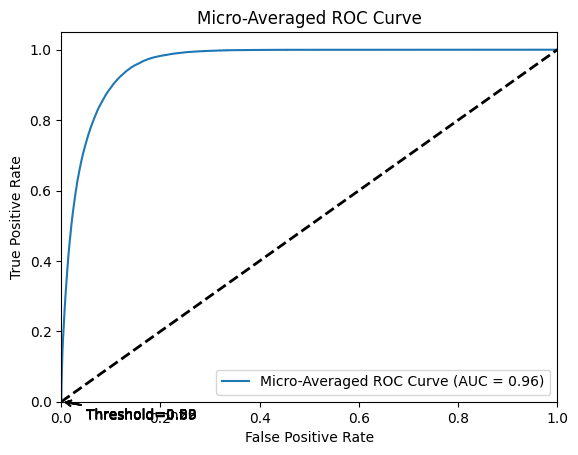

Confusion Matrix:
 [[29332 12151    28     0     0     4   853]
 [10036 45203  1055     2    46   222    97]
 [    0   633  6023   137     7   351     0]
 [    0     0   323   144     0    82     0]
 [    8  1810    69     0    10     2     0]
 [    0   964  1856    25    21   607     0]
 [ 1873    36     4     0     0     0  2189]]
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.64      0.84      0.73      7151
           4       0.47      0.26      0.34       549
           5       0.12      0.01      0.01      1899
           6       0.48      0.17      0.26      3473
           7       0.70      0.53      0.60      4102

    accuracy                           0.72    116203
   macro avg       0.55      0.47      0.49    116203
weighted avg       0.70      0.72      0.71    116203



In [24]:
# Now check results

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

y_pred = lreg.predict(X_test)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# classification report
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# For a ROC... multiclass is more complicated
# Several methods, choosing Micro-Averaged for best overall summary
probs = lreg.predict_proba(X_test)


# Binarize the true labels
classes = np.unique(y_test)
y_true_binarized = label_binarize(y_test, classes=classes)

# Compute micro-average ROC
fpr, tpr, thresholds = roc_curve(y_true_binarized.ravel(), probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot the micro-averaged ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Micro-Averaged ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
for i, threshold in enumerate(thresholds[::len(thresholds)//5]):
    plt.annotate(f'Threshold={threshold:.2f}', 
                 xy=(fpr[i], tpr[i]), 
                 xytext=(fpr[i] + 0.05, tpr[i] - 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle="->"),
                 fontsize=10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-Averaged ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Then, can choose a different threshold
threshold = 0.7
y_pred2 = (probs >= threshold).astype(int)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# classification report
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

This first